<span style="font-size: 14pt">MIPT, Advancaed ML, Autumn 2017</span>

<span style="font-size: 16pt"> Seminar #0: Inroduction into Time Series Analysis

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h3> Plan </h3>
  * **About the course** (10 mimutes)
  * **Remind: Regression** (20 minutes)
  * **Simple Autoregression Model**
     - Time series example: Energy consumption data (15 minutes)
     - Build ts forecast using LR (15 minutes)
     - Practical task (20 minutes)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import Image

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import scipy as sc

%matplotlib inline

In [2]:
# be careful with versions
import sys
sys.version

'2.7.13 (default, Apr  4 2017, 08:47:57) \n[GCC 4.2.1 Compatible Apple LLVM 8.1.0 (clang-802.0.38)]'

<h1 align="center">Course Rules</h1>

<span style="color:blue; font-size: 12pt; font-family: 'Verdana'"> Расписание, результаты смотрите на <a href="https://ml-mipt.github.io/">странице</a> курса</span>

Курс будет состоять из 13 ключевых лекций и 1-2 гостевых лекций (от лучших в стране специалистов ;)). 

**Обратная связь**
 - Мы вас просим оставлять отзывы о семинарах и лекциях (это не займёт более 1-2 минут вашего времени)
 - Домашние задания будут доступны только после оставления обратной связи

**Домашнее задание**
- Будет выдаваться после каждого семинара, иногда это будут контесты
- Задание необходимо сдать в течении 6 дней после семинара
- Задание оценивается  1, если вы его сделали достаточно хорошо
- Задание оценивается  0, если вы не выполнили задание или сделали много ГРУБЫХ ошибок (или списали, или дали списать) 
- Задания, сданные после дедлайна, не проверяются

**Контесты**
- Вы получаете 1-2 балл, если побили бейзлайн и коротко текстом описали решение, 0 - если нет
- Бонусы получают первые три человека в каждой в группе

**Экзамен**
- Будет экзамен, автоматов не будет
- Будет список вопросов 
- Будет теор. минимум

**Оценка**
Финальная оценка будет вычисляться, как
    $$mark = (c_1 \cdot hw\_credits + c_2 \cdot contest\_credits + c_3 \cdot exam\_creidts)$$
коэффициенты будут объявлены позже

<h1 align="center"> Linear Regression </h1>
** Вопросы **
* Как выглядит решающее правило в LR?
* Как настриваются веса в LR?
* Какие проблемы возникают при обучении LR? С чем связано переобучение LR?
* Что такое гребневая регрессия и Лассо Тибширани?

## For Regression

## $$Y = \mathbf{R},~X\in \mathbf{R}^d$$
## $$y_{predict}(x) = <w, x> $$ 
## $$Q(w, X^\ell) = \frac{1}{n} \sum_i^n L(y_i, <w,x_i>) \rightarrow \min_w$$

### Linear Regression (Equation)

## $$ g(x, \alpha) = \sum_{i}^{n} \alpha_i f_i(x) $$
## $$ Q(\alpha) = \| F\alpha - y \|^2 $$

Normal Equation

## $$ \alpha^{*} = (F^{T}F)^{-1}F^{T}y = F^{+}y $$
## $$ Q(\alpha^{*}) = \| P_{F}y - y \|^2 $$
## $$ P_{F} = FF^{+} $$

## Регуляризация

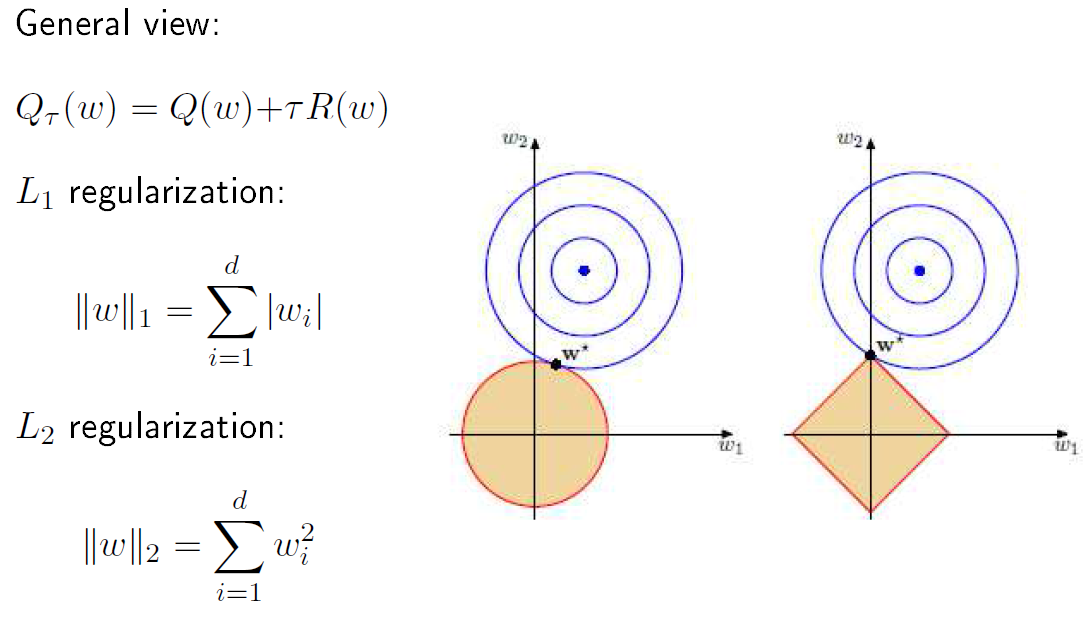

In [3]:
Image('pic/Regularization.png', retina=True)

### Regularization for LR:

## $$ Q_{\tau}(\alpha) = \| F\alpha - y\|^2 + \tau \| \alpha \|^2 $$

vs

## $$ \sum_{i=1}^{n} |\alpha_i| \leq C $$

Student Question: Whatr Esle?

See <a href='http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf'> К.В. Воронцов, Методы машинного обучения по прецедентам </a>
* глава 5.3 Линейная регрессия

In [4]:
from IPython.display import IFrame
IFrame(src="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#examples-using-sklearn-linear-model-linearregression", width=800, height=400)

In [5]:
IFrame(src="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge", width=800, height=400)

## Underfitting VS Overfitting

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


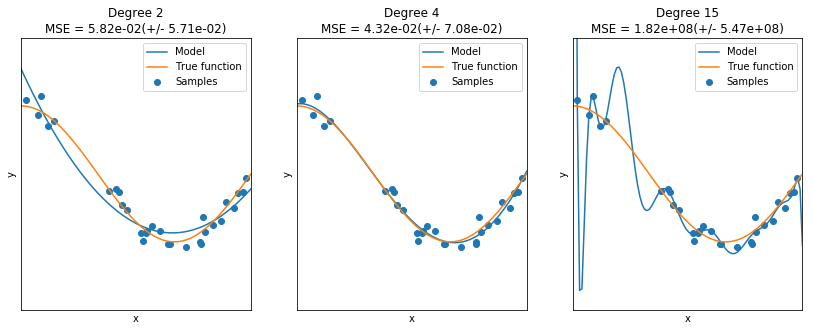

In [6]:
np.random.seed(0)

n_samples = 30
degrees = [2, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X) # ещё один способ определить функцию: с помощью lambda-функции

# Data Generation
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = model_selection.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

<h1 align="center"> Simple Autoregression Model</h1>

## Пример временого ряда: energy consumption data

In [62]:
# Caution: different version of pandas needs differnt codes!!!
# ts = pd.read_csv('consumption_train.csv', sep='\t', decimal=',')
ts = pd.read_csv('consumption_train.csv', sep='\t', decimal='.', parse_dates=True, dayfirst=False, index_col='Dates') 
ts[['EnergyCons']].head(10)

,EnergyCons
Dates,
2005-01-01 00:00:00,1290
2005-01-01 01:00:00,1266
2005-01-01 02:00:00,1273
2005-01-01 03:00:00,1280
2005-01-01 04:00:00,1293
2005-01-01 05:00:00,1263
2005-01-01 06:00:00,1279
2005-01-01 07:00:00,1304
2005-01-01 08:00:00,1330


Временной ряд - это последовательность значений некоторой величины, зафиксированные через одинаковые промежутки времени.

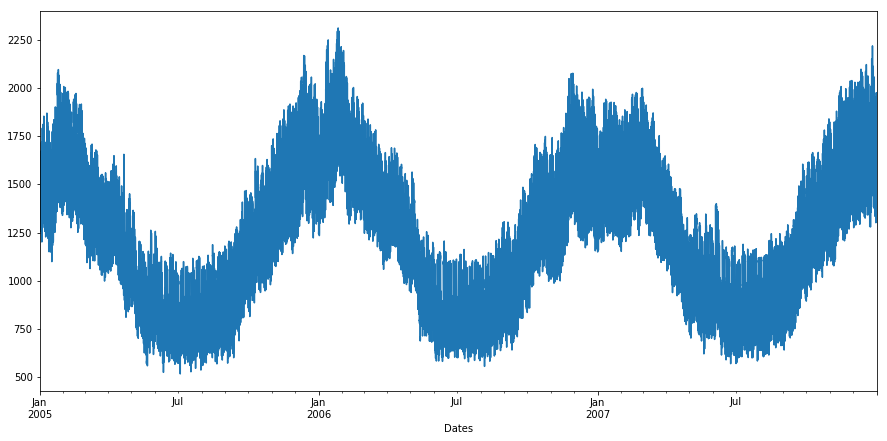

In [8]:
# Plot time series
ts['EnergyCons'].plot(figsize=(15,7))

** Вопрос: ** Какие закономерности в данных можно наблюдать на картинке?

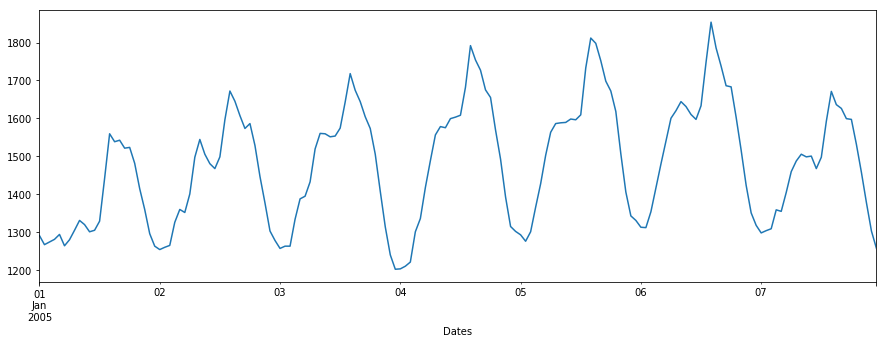

In [24]:
# the first week
#ts.ix['2005-01-01 00:00:00':'2005-01-07 23:00:00', 'EnergyCons'].plot(figsize=(15,5)) # Python 2
ts.loc['2005-01-01 00:00:00':'2005-01-07 23:00:00', 'EnergyCons'].plot(figsize=(15,5)) # Python 3

** Вопрос: ** Какие закономерности в данных можно наблюдать на картинке?

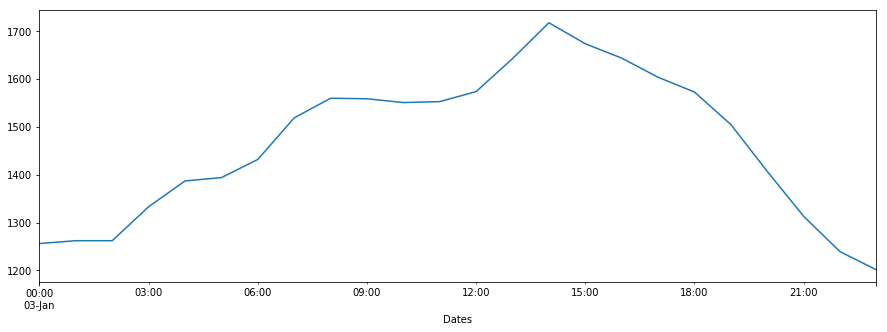

In [10]:
# the first day
ts.loc['2005-01-03 00:00:00':'2005-01-03 23:00:00', 'EnergyCons'].plot(figsize=(15,5))

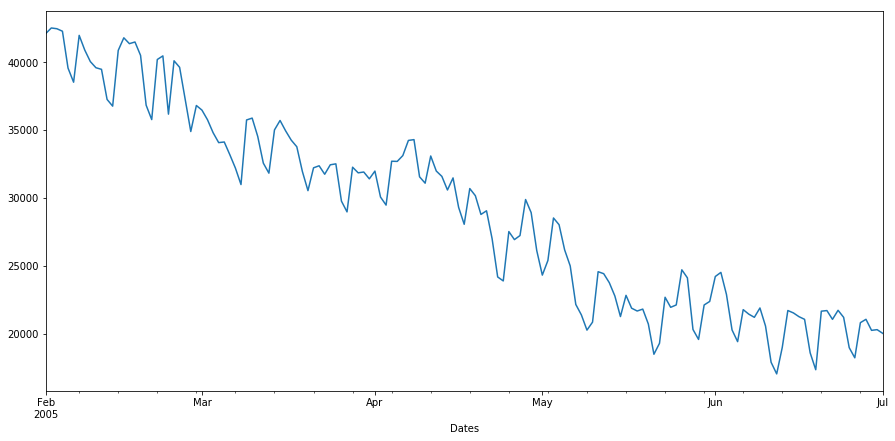

In [11]:
ts['EnergyCons'].loc['2005-02-01 00:00':'2005-07-01 23:00'].resample("D").sum().plot(figsize=(15,7))

** Вопрос: ** Какие закономерности в данных можно наблюдать на картинке?

## STL-decomposition: разложение ВР на тренд-сезонность-шум

In [12]:
import statsmodels.api as sm

/usr/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [28]:
IFrame(src="http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html", width=800, height=400)

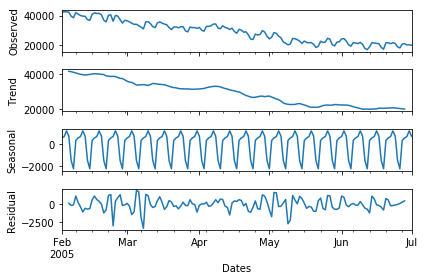

In [13]:
res = sm.tsa.seasonal_decompose(ts['EnergyCons'].loc['2005-02-01 00:00':'2005-07-01 23:00'].resample("D").sum())
resplot = res.plot()

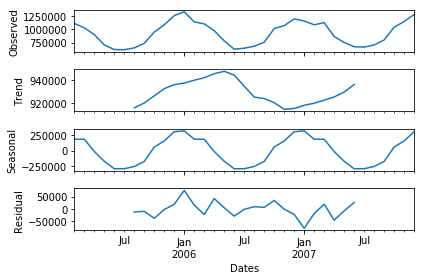

In [14]:
# fig = plt.figure(figsize=(15,10))
res = sm.tsa.seasonal_decompose(ts['EnergyCons'].loc['2005-02-01 00:00':'2008-01-01 23:00'].resample("M").sum())
resplot = res.plot()

** Вопрос: ** Как спрогнозировать такой временной ряд?
 - Подсказка: как описать зависимость последующих значений временного ряда от предыдущего?

### Стационарные временные ряды

Для более сложных алгоритмов (например, АРИМА) важно, чтобы временной ряд был стационарным, то есть:
    - Среднее не являлось функцией от времени
    - Дисперсия не являлась функцией от времени
    - Ковариация между i-ым и (i+m)-ым куском ряда не являлась функцией от времени

Проверка стационарности:
    - Нарисовать и посмотреть
    - Dickey-Fuller test

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  after removing the cwd from sys.path.


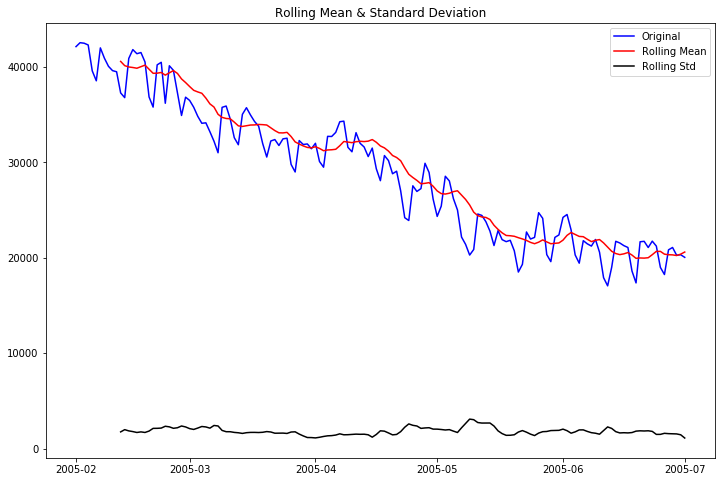

In [38]:
timeseries = ts['EnergyCons'].loc['2005-02-01 00:00':'2005-07-01 23:00'].resample("D").sum()

rolmean = pd.rolling_mean(timeseries, window=12)
rolstd = pd.rolling_std(timeseries, window=12)

#Plot rolling statistics:
fig = plt.figure(figsize=(12, 8))
orig = plt.plot(timeseries, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [39]:
from statsmodels.tsa.stattools import adfuller

print 'Results of Dickey-Fuller Test:'
dftest = adfuller(timeseries, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print dfoutput 

Results of Dickey-Fuller Test:
Test Statistic                  -1.108288
p-value                          0.711756
#Lags Used                      12.000000
Number of Observations Used    138.000000
Critical Value (5%)             -2.882722
Critical Value (1%)             -3.478648
Critical Value (10%)            -2.578065
dtype: float64


Что делать, чтобы сделать ряд стационарным?

- Deflation by CPI
- Logarithmic
- First Difference
- Seasonal Difference
- Seasonal Adjustment

In [40]:
def test_stationarity(timeseries):
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput 

In [44]:
ts_1 = ts['EnergyCons'].loc['2005-01-01 00:00':'2005-12-01 23:00'].resample("D").sum()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


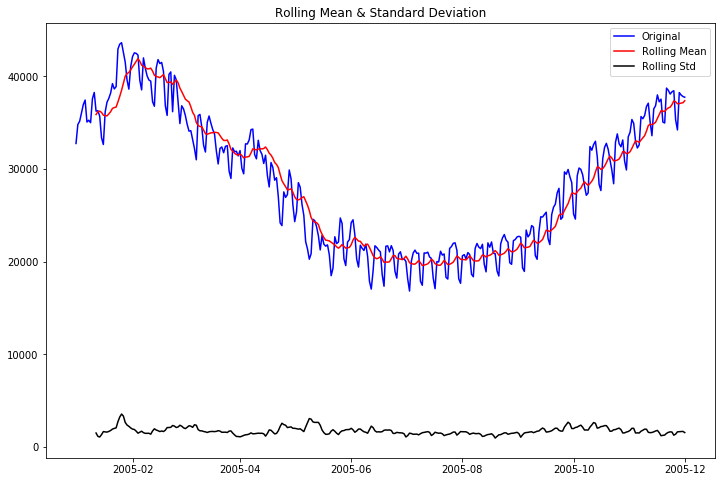

Results of Dickey-Fuller Test:
Test Statistic                  -1.039842
p-value                          0.738457
#Lags Used                      15.000000
Number of Observations Used    319.000000
Critical Value (5%)             -2.870643
Critical Value (1%)             -3.451017
Critical Value (10%)            -2.571620
dtype: float64


In [46]:
test_stationarity(ts_1)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


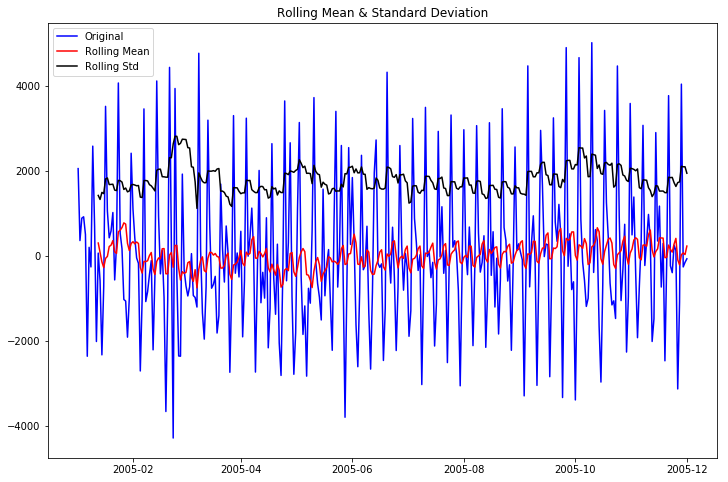

Results of Dickey-Fuller Test:
Test Statistic                  -3.572710
p-value                          0.006305
#Lags Used                      16.000000
Number of Observations Used    317.000000
Critical Value (5%)             -2.870701
Critical Value (1%)             -3.451148
Critical Value (10%)            -2.571651
dtype: float64


In [51]:
ts_2 = ts_1 - ts_1.shift(1)
test_stationarity(ts_2.dropna(inplace=False))

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


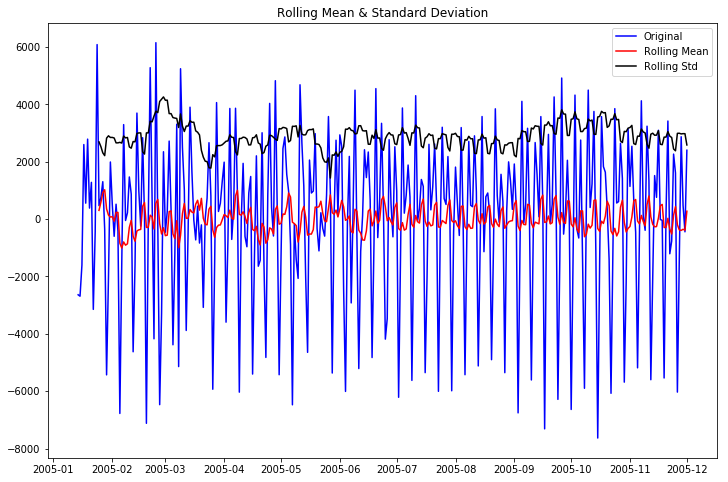

Results of Dickey-Fuller Test:
Test Statistic                -8.335760e+00
p-value                        3.275831e-13
#Lags Used                     1.600000e+01
Number of Observations Used    3.050000e+02
Critical Value (5%)           -2.871063e+00
Critical Value (1%)           -3.451974e+00
Critical Value (10%)          -2.571844e+00
dtype: float64


In [52]:
ts_3 = ts_2 - ts_2.shift(12)
test_stationarity(ts_3.dropna(inplace=False))

### ACF and PACF graphs

In [83]:
timeseries = ts['EnergyCons'].loc['2005-02-01 00:00':'2005-07-01 23:00'].resample("D").sum()

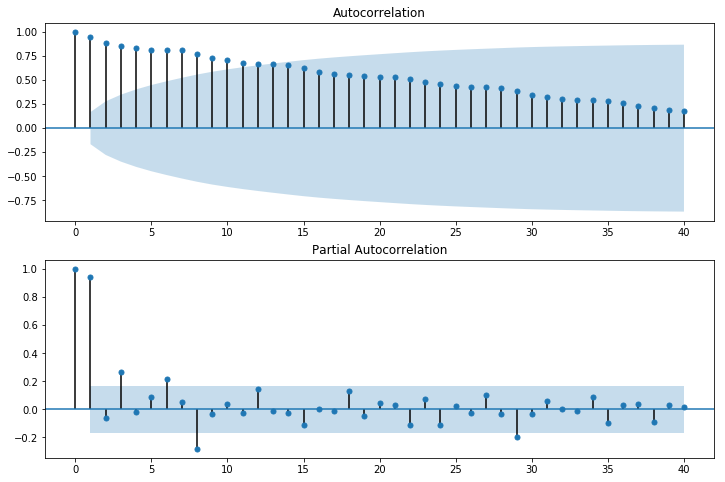

In [84]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(timeseries.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(timeseries.iloc[13:], lags=40, ax=ax2)

### Simple ARIMA forecast

In [85]:
mod = sm.tsa.statespace.SARIMAX(timeseries, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print results.summary()

                                 Statespace Model Results                                 
Dep. Variable:                         EnergyCons   No. Observations:                  151
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -1267.100
Date:                            Wed, 06 Sep 2017   AIC                           2540.201
Time:                                    01:58:56   BIC                           2549.252
Sample:                                02-01-2005   HQIC                          2543.878
                                     - 07-01-2005                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.2039      0.045      4.523      0.000       0.116       0.292
ma.S.L12      -0.7558      0.069   

In [92]:
test_ts = pd.DataFrame()
test_ts['train'] = timeseries
test_ts['forecast'] = results.predict(start = 125, end= 150, dynamic= True)  

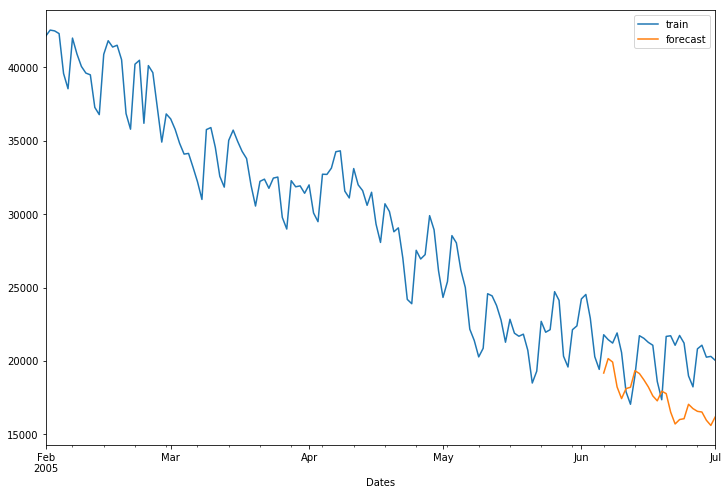

In [93]:
test_ts[['train', 'forecast']].plot(figsize=(12, 8))

## Autoregression: build matrix of autoregression

In [15]:
sc.linalg.hankel([1,2,3,4], [4,7,7,8,9])

array([[1, 2, 3, 4, 7],
       [2, 3, 4, 7, 7],
       [3, 4, 7, 7, 8],
       [4, 7, 7, 8, 9]])

In [16]:
def get_autoregrmatrix(x,h,K):
    L = len(x)
    X = sc.linalg.hankel(x[:L-h-K+1], 
                          np.hstack((x[-K],x[-K:-1]))) # is needed to repeat x[-K] in second part
    y = x[K+h-1:]
    return X,y

## Forecast for next hour (h=1) using 1 week history (K=168)

In [17]:
K=168
h = 1 # delay

x_train = ts['EnergyCons'].loc['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ts['EnergyCons'].loc['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)

In [18]:
print (X_train.shape)
print (y_train.shape)

(8593, 168)
(8593,)


In [19]:
# Matrix of Samples and Regressors
X_train

array([[1290, 1266, 1273, ..., 1377, 1302, 1256],
       [1266, 1273, 1280, ..., 1302, 1256, 1257],
       [1273, 1280, 1293, ..., 1256, 1257, 1267],
       ..., 
       [1332, 1293, 1225, ..., 1645, 1541, 1394],
       [1293, 1225, 1235, ..., 1541, 1394, 1349],
       [1225, 1235, 1222, ..., 1394, 1349, 1312]])

In [20]:
# Target Vector
y_train

Dates
2005-01-08 00:00:00    1257
2005-01-08 01:00:00    1267
2005-01-08 02:00:00    1274
2005-01-08 03:00:00    1339
2005-01-08 04:00:00    1376
2005-01-08 05:00:00    1400
2005-01-08 06:00:00    1439
2005-01-08 07:00:00    1504
2005-01-08 08:00:00    1557
2005-01-08 09:00:00    1518
2005-01-08 10:00:00    1500
2005-01-08 11:00:00    1501
2005-01-08 12:00:00    1546
2005-01-08 13:00:00    1645
2005-01-08 14:00:00    1718
2005-01-08 15:00:00    1701
2005-01-08 16:00:00    1655
2005-01-08 17:00:00    1635
2005-01-08 18:00:00    1616
2005-01-08 19:00:00    1530
2005-01-08 20:00:00    1435
2005-01-08 21:00:00    1349
2005-01-08 22:00:00    1266
2005-01-08 23:00:00    1247
2005-01-09 00:00:00    1227
2005-01-09 01:00:00    1252
2005-01-09 02:00:00    1250
2005-01-09 03:00:00    1298
2005-01-09 04:00:00    1355
2005-01-09 05:00:00    1384
                       ... 
2005-12-30 19:00:00    1682
2005-12-30 20:00:00    1586
2005-12-30 21:00:00    1484
2005-12-30 22:00:00    1401
2005-12-30 23:

Train score: 0.997, Test score: 0.991


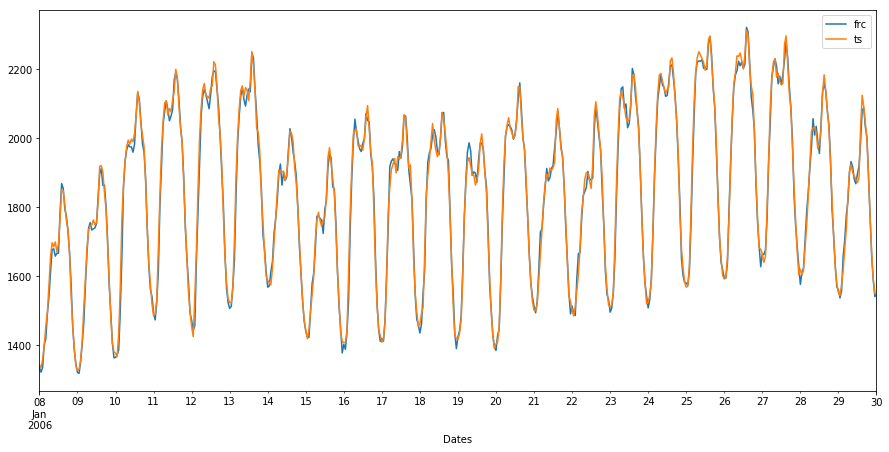

In [21]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize=(15,7))

## Try another delay: h=168

Train score: 0.933, Test score: 0.839


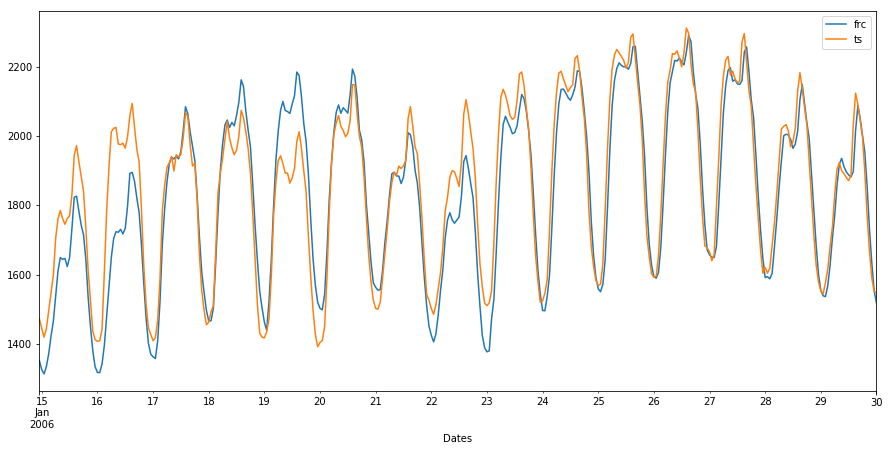

In [22]:
K=168
h = 168 # delay

x_train = ts['EnergyCons'].loc['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ts['EnergyCons'].loc['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize=(15,7))

## Practical Task
Draw dependence of the cross_validation score (linear_regression.score) on the horizon of the forecast for LR model in the case of energy consumption forecasting. You should write code to show dependence for $h=1,2,\dots, 720$. You can choose amount of regressors for LR in experiment as much as you want.   

In [1]:
# your code here

<h1 align="center"> Conclusion </h1>

** Your feedback ** 
  * оцените <a href="https://drive.google.com/open?id=1S18k3NtsP_OuWhWi_tHhiiLUBprsbWipAzx54Ys4JFQ"> семинар </a>

## Answer questions 
  ** 1. What is time series? **
     
     <Answer>
       
  ** 2. What is delay and horizon of forecast?**
   
     <Answer>
         
  ** 3. What is Least Squared Method for Linear Regression?**
  
     <Answer>
          
  ** 4. What is the solution of linear regression via LS method (in terms of matrix $X, \alpha, Y$)? **
  
     <Answer>
          
  ** 5. Write down main problems of LS method. **
  
     <Answer>
          
  ** 6. What hankel transformation of a matrix? **
  
     <Answer>
          